# Exercise 1: Estimate the probability of heads, by observing samples

In [95]:
import numpy as np
from scipy.stats import binom, norm, beta
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
#Assume we have a unfair coin, the chance of getting a head is greater 
#than the chance of getting a tail (i.e., P('H') = 0.5).
p_head_true             = 0.7

#let's throw this coin 150 times, and each time, we compute the likelihood
#of a range of hypothesized P('H').
numFlips                = 150
p_head_hyp              = np.arange(0.01,1,0.01)

#initialize the following matrices:
#flips    : stores binary values (1: head; 0: tail) for each coin flip
#numHeads : stores the number of heads you get up until each time point
#L_p_hyp, LL_p_hyp    : the likelihood / the log likelihood of P('H') 
#                       given a range of hypothesized p at each time point
#p_hat_byL, p_hat_byLL: the p value that corresponds to the highest
#                       likelihood value / the highest log likelihood
#                       value at each time point
flips,numHeads          = [],[]
L_p_hyp, LL_p_hyp       = [],[]
p_hat_byL, p_hat_byLL   = [],[]


In [3]:
#YOUR CODE STARTS HERE
#------------------------------------------------------------------------
#let's loop through all the coin flips
randNum = np.random.rand(1,numFlips)
for i in range(numFlips):
    #flip the coin, and see if it's a head to a tail (hint: np.random.rand)
    flips.append(randNum[0][i] < p_head_true)

    #compute the number of heads you got so far
    numHeads.append(np.nansum(flips))

    #compute the likelihood of each hypothesized p value
    L_p_hyp.append(binom.pmf(numHeads[-1], i+1, p_head_hyp))

    #compute the log likelihood of each hypothesized p value
    LL_p_hyp.append(numHeads[-1]*np.log(p_head_hyp) + \
                        (i+1 - numHeads[-1])*np.log(1 - p_head_hyp))

    #find the p value that corresponds to the max likelihood and store it
    #in p_hat_byL(i)
    max_idx_byL  = np.argmax(L_p_hyp[-1])
    p_hat_byL.append(p_head_hyp[max_idx_byL])

    #find the p value that corresponds to the max likelihood and store it
    #in p_hat_byLL(i)
    max_idx_byLL = np.argmax(LL_p_hyp[-1])
    p_hat_byLL.append(p_head_hyp[max_idx_byLL])
#------------------------------------------------------------------------

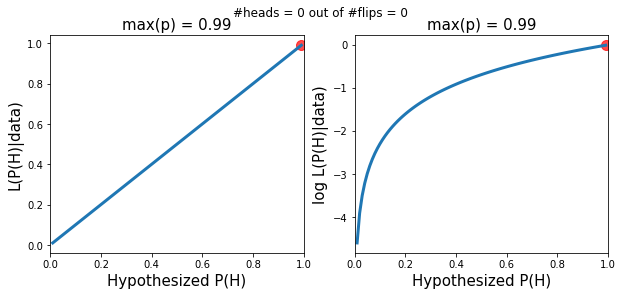

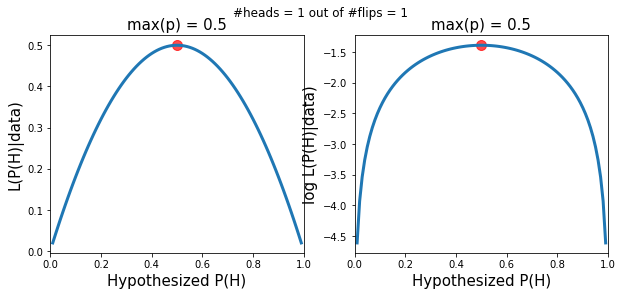

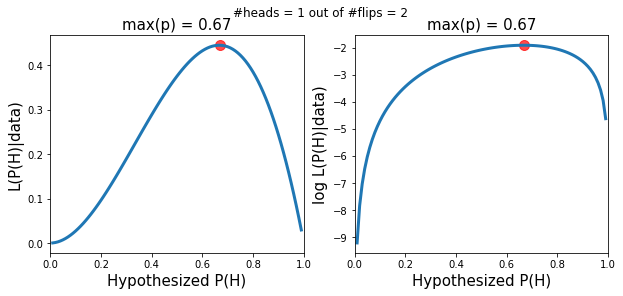

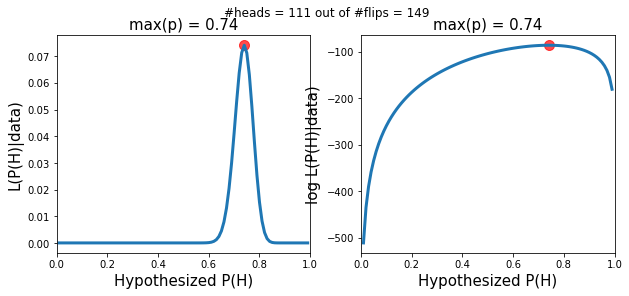

In [4]:
#No changes are needed for this section
flips_int = [int(f) for f in flips]

for i in [0,1,2,numFlips-1]:#np.linspace(0,numFlips+1,20).astype(int):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize= (10,4))
    #plot how the likelihood function changes as number of coin flips
    ax[0].plot(p_head_hyp, L_p_hyp[i], lw = 3)
    ax[0].scatter(p_hat_byL[i], np.max(L_p_hyp[i]), s = 100, c='r', alpha = 0.7)
    #ax[0].text(0.2, 0.9, 'max(p) = ' + str(p_hat_byL[i]), fontsize = 15) 
    ax[0].set_xlim([0, 1])
    ax[0].set_xlabel('Hypothesized P(''H'')', fontsize = 15)
    ax[0].set_ylabel('L(P(''H'')|data)',fontsize = 15) 
    ax[0].set_title('max(p) = ' + str(p_hat_byL[i]), fontsize = 15)

    #plot how the log likelihood function changes as number of coin flips
    ax[1].plot(p_head_hyp, LL_p_hyp[i], lw = 3)
    ax[1].scatter(p_hat_byLL[i], np.max(LL_p_hyp[i]), s = 100, c='r', alpha = 0.7)
    #ax[1].text(0.2,  -0.4, 'max(p) = ' + str(p_hat_byLL[i]), fontsize = 15) 
    ax[1].set_xlim([0, 1])
    ax[1].set_xlabel('Hypothesized P(''H'')', fontsize = 15)
    ax[1].set_ylabel('log L(P(''H'')|data)',fontsize = 15) 
    ax[1].set_title('max(p) = ' + str(p_hat_byLL[i]), fontsize = 15)
    fig.suptitle('#heads = ' + str(sum(flips_int[:i])) + ' out of #flips = ' + str(i))
    plt.show()


Text(0, 0.5, 'Proportion of Heads')

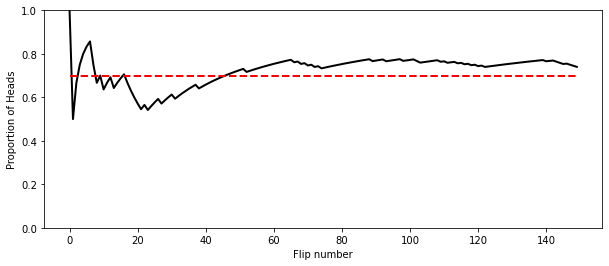

In [5]:
#plot the proportion of heads as a function of coin flips
#Notice that it converges to p_head_true = 0.7.

fig = plt.subplots(nrows=1, ncols=1,figsize= (10,4))
plt.plot([numHeads[i]/(i+1) for i in range(numFlips)], color ='k',linestyle = 'solid', lw =2)
plt.plot([p_head_true for i in range(numFlips)], color = 'r', linestyle ='dashed', lw=2)
plt.ylim([0,1]);plt.xlabel('Flip number'); plt.ylabel('Proportion of Heads')


# Exercise 2. Estimate the posterior probability of the coin getting heads

(incorporating prior knowledge)

In [6]:
#first we assume three different possible priors
#1. given past experience, you think it's most likely that coins are fair
prior_p_head_fair   = norm.pdf(p_head_hyp, 0.5,0.1)
prior_p_head_fair   = prior_p_head_fair/np.sum(prior_p_head_fair)

#2. you are in a underground casino, and you suspect that the coin in unfair
prior_p_head_biased = beta.pdf(p_head_hyp, 2, 5);
prior_p_head_biased = prior_p_head_biased/np.sum(prior_p_head_biased)

#3. you are a new born baby, and you have never seen a coin before
prior_p_head_uni    = np.ones(len(p_head_hyp))/len(p_head_hyp);
prior_all = [prior_p_head_fair, prior_p_head_biased, prior_p_head_uni]
ttl       = ['Suspect fair', 'Suspect biased', 'No idea']

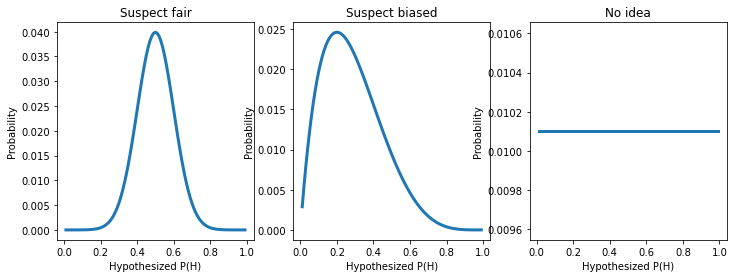

In [7]:
#visualize the priors
fig,ax = plt.subplots(nrows=1, ncols=3,figsize= (12,4))
for i in range(len(prior_all)):
    ax[i].plot(p_head_hyp, prior_all[i], lw=3)
    ax[i].set_title(ttl[i]); ax[i].set_xlabel('Hypothesized P(''H'')')
    ax[i].set_ylabel('Probability');


In [8]:
#compute the posterior each time you get a new coin flip
posterior_p_hyp = [] #NaN(numFlips, size(prior_all,1), length(p_head_hyp));
L_p_hyp_1flip   = [] #NaN(numFlips, length(p_head_hyp));

#YOUR CODE STARTS HERE
#--------------------------------------------------------------------------
for i in range(numFlips):
    posterior_p_hyp_i = []
    #if this is your first coin flip, use the prior we define above
    if i == 0: prior = prior_all
    #if you've already had some observations of the coin flips, the updated
    #prior of the current trial is the posterior from the previous trial.
    else: prior = posterior_p_hyp[i-1]

    #compute the likelihood of P('H') given the current coin flip (just 1
    #observation)
    L_p_hyp_1flip.append(binom.pmf(flips[i], 1, p_head_hyp))

    #compute the posterior probability of P('H') by taking the prior into
    #account (make sure the posterior probability sums up to 1)
    for j in range(len(prior_all)):
        posterior_p_hyp_temp = L_p_hyp_1flip[-1]*prior[j]
        posterior_p_hyp_i.append(posterior_p_hyp_temp/np.sum(posterior_p_hyp_temp))
    posterior_p_hyp.append(posterior_p_hyp_i)
#--------------------------------------------------------------------------

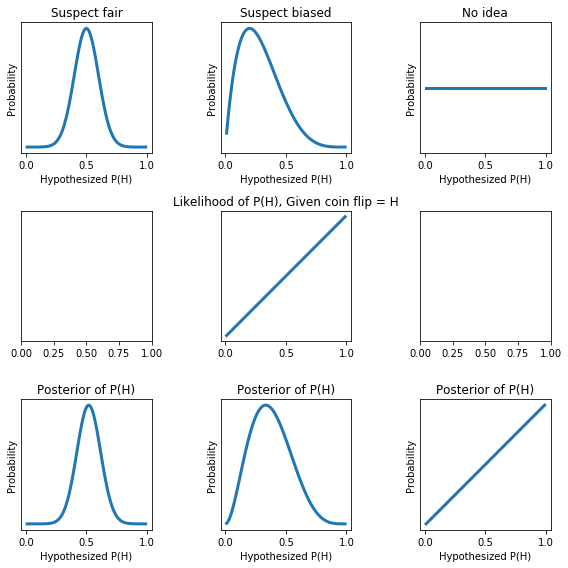

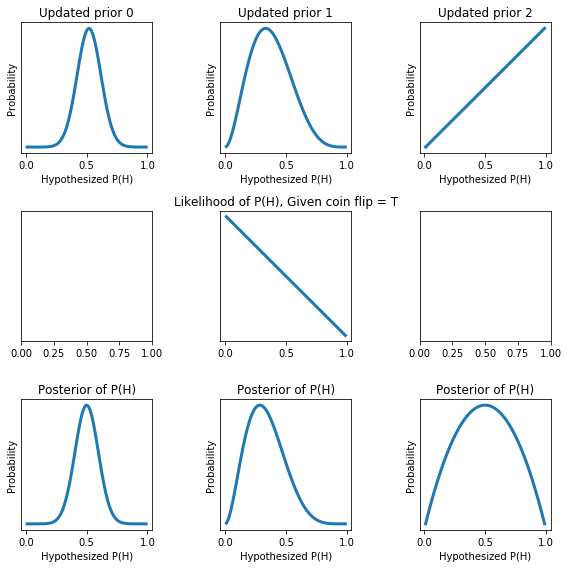

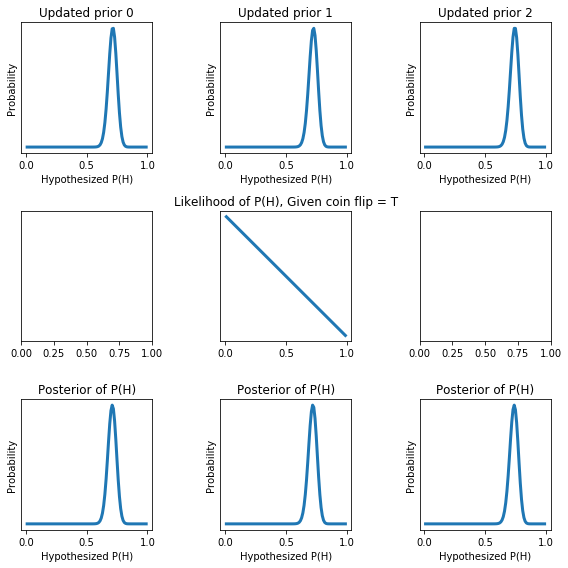

In [9]:
#No changes are needed for this section
for t in [0,1,numFlips-1]:
    fig, ax = plt.subplots(nrows=3, ncols=3,figsize= (8,8))
    
    #visualize the priors (which are updating on each trial)
    for i in range(len(prior_all)):
        if t == 0: ax[0,i].plot(p_head_hyp, prior_all[i], lw = 3)
        else: ax[0,i].plot(p_head_hyp, posterior_p_hyp[t-1][i], lw = 3)
        
        if t == 0: ax[0,i].set_title(ttl[i])
        else: ax[0,i].set_title('Updated prior ' + str(i))
        ax[0,i].set_xlabel('Hypothesized P(''H'')')
        ax[0,i].set_ylabel('Probability')
        ax[0,i].set_yticks([])

    #visualize the likelihood given only one observation
    ax[1,1].plot(p_head_hyp, L_p_hyp_1flip[t], lw= 3)
    if flips[t]: r = 'H'
    else: r = 'T'
    ax[1,0].set_yticks([]); ax[1,1].set_yticks([]); ax[1,2].set_yticks([])
    ax[1,1].set_title('Likelihood of P(''H''), Given coin flip = ' + r)

    #visualize the posterior probability of P('H')
    for i in range(len(prior_all)):
        ax[2,i].plot(p_head_hyp, posterior_p_hyp[t][i], lw=3);
        ax[2,i].set_yticks([])
        ax[2,i].set_title('Posterior of P(''H'')')
        ax[2,i].set_xlabel('Hypothesized P(''H'')')
        ax[2,i].set_ylabel('Probability')
    plt.tight_layout()

You're probably wondering why we updated the likelihood of P('H') when more observations come in (lines 4-93), but here we update the prior and only compute the likelihood of P('H') of the current coin flip. Mathematically they are the same!

Updated likelihood given all past coin flips x original prior
= Likelihood of the current coin flip x updated prior given all past coin flips

# Exercise 3: Simulate 2IFC

In each trial, participants are presented with an auditory and a visual stimulus with a temporal discrepancy between them. The discrepancy can have various levels, ranging from -400 to 400 ms with an increment of 50ms. Positive values represent the visual stimulus coming before the auditory stimulus; negative values represent the auditory stimulus coming first. After stimulus presentation, participants are asked to report whether they judge the temporal order, i.e., report which stimulus comes first (V or A). Each temporal discrepancy (a.k.a. stimulus onset asynchrony; SOA) is tested multiple times.

In [96]:
#let's first define levels of SOA (in ms)
t_diff        = np.arange(-400,401,50)
#the number of levels
len_deltaT    = len(t_diff)
#the number of tested trials for each level
numTrials     = 20

#sounds are normally perceived faster as visual stimuli by ~60ms.
#In other words, participants perceive an auditory and a visual stimulus
#as simultaneous when the auditory stimulus is delayed by 60ms.
mu_delta_t    = 60
#Sigma controls participants' threshold. A high value represents
#participants are really bad at the task; a low value means participants
#are able to tell even if the temporal offset is very small.
sigma_deltaT  = 80

On a small proportion of trials, observers will respond independently of the stimulus level. For example, observers might have missed the presentation of the stimulus, perhaps due to a sneeze or a momentary lapse of attention. On such trials, observers may produce an incorrect response even if the stimulus level was so high that they would normally have produced a correct response. As a result of these lapses, the psychometric function will asymptote to a value that's slightly less than 1 when t_A - t_V is large, and asymptote to a value that's slightly greater than 0 when t_A - t_V is small.

In [98]:
lapse         = 0.05
#Define the cumulative Gaussian
P_tilde  = lambda mu, sig, lapse, x: lapse/2 + (1-lapse)*norm.cdf(x, mu, sig)

In [100]:
#YOUR CODE STARTS HERE
#--------------------------------------------------------------------------
#pass the variables we've defined into the function P_tilde to compute the
#probability of reporting 'V-first'
P_reportV_1st = P_tilde(mu_delta_t, sigma_deltaT, lapse, t_diff)

#For simulating data, here we'll try two methods, which will give the same
#results.
#------------------------ Method 1: using for loops------------------------
randNum, numT_V1st, sim_prob_V1st = [],[],[]
for i in range(len_deltaT): #for each SOA
    #we first generate random numbers (size = 1 x numTrials) from the
    #standard uniform distribution
    randNum.append(np.random.rand(numTrials))

    #get logicals (booleans) for whether the random numbers are smaller
    #than the predicted probability at stimulus level i
    #1: 'V-first' response
    #0: 'V-second' or 'A-first' response
    bool_V1st        = randNum[-1] < P_reportV_1st[i]

    #compute the number of simulated 'V-first' responses
    numT_V1st.append(np.sum([int(idx) for idx in bool_V1st]))

    #compute the probability of 'V-first' responses
    sim_prob_V1st.append(numT_V1st[i]/numTrials)
numT_V1st = np.array(numT_V1st)
sim_prob_V1st = np.array(sim_prob_V1st)

Now let's visualize the psychometric curve and simulated data. If the code you write above is correct, then it should be very close to the curve.

Hard to tell? Try increase numTrials from 20 to 1000.

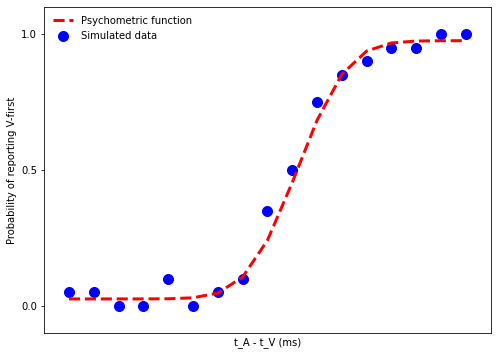

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize= (8,6))
plt.plot(t_diff, P_reportV_1st, c = 'r', lw=3,linestyle = 'dashed')
plt.scatter(t_diff, sim_prob_V1st, s = 100, c = 'b')
plt.xlim([-450, 450]); plt.ylim([-0.1,1.1]); plt.xlabel('t_A - t_V (ms)')
plt.ylabel('Probability of reporting ''V-first'''); plt.xticks(t_diff[0:2:-1])
plt.yticks([0,0.5,1]); plt.legend(['Psychometric function','Simulated data'], frameon = False)


In [103]:
#------------------------ Method 2: using matrices ------------------------
#we first replicate the vector P_reportV_1st to match the size of the
#matrix randNum
P_reportV_1st_rep = np.tile(P_reportV_1st,(numTrials,1))

#then we get logicals (booleans) for whether the random numbers are smaller
#than the predicted probability at all stimulus levels at the same time
bool_V1st_        = np.transpose(randNum) < P_reportV_1st_rep

#compute the number of simulated 'V-first' responses (be careful with the
#dimension you choose for summation)
numT_V1st_        = np.sum(bool_V1st_.astype(int),0)

#compute the probability of 'V-first' responses at all stimulus levels at
#the same time
sim_prob_V1st_    = numT_V1st_/numTrials


#if your calculation is correct, then sim_prob_V1sit_ should be the same as
#sim_prob_V1st. Check:
if np.array_equal(np.around(sim_prob_V1st,4), np.around(sim_prob_V1st_,4)): print('Check!')
#--------------------------------------------------------------------------

Check!


## Exercise 4: Fitting a psychometric curve to the fake data
Now given the simulated fake data, let's try fitting a psychometric function to the data by maximizing the log likelihood. For simplicity, let's say the only unknown parameter is $\mu$, and we know $\sigma$ and the lapse rate.

In [104]:
#For simplicity, let's say the only unknown parameter is mu, and we know
#sigma and the lapse rate.
def LogL_mu_hyp(p, x, n, k):
    #p: hypothesized mu
    #x: t_A - t_V (timing difference)
    #n: the number of trials for each stimulus intensity
    #k: the number of 'V-first' responses
    from scipy.stats import norm
    from numpy import log
    
    LL = 0
    for i in range(len(k)): #number of stimulus levels
        try:
            pc = norm.cdf(x, p, sigma_deltaT)*(1-lapse) + lapse/2
            LL += np.sum(k*log(pc) + (n-k)*log(1-pc))
        except:
            print('.',end = '')
    return LL

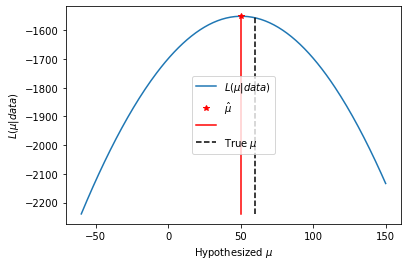

In [105]:
#For fitting a psychometric curve, here we'll try two methods, which will 
#give similar results.
#----------------------- Method 1: using grid search ---------------------- 

#specify all the mu you want to test and compute its likelihood
mu_hyp = np.arange(-60, 151, 1)
#use arrayfun to compute the log likelihood of every single hypothesized mu
LogL_mu = np.array([LogL_mu_hyp(mu_,t_diff,numTrials, numT_V1st) for mu_ in mu_hyp])
#find the mu that corresponds to the greatest log likelihood
max_idx = np.argmax(LogL_mu)
mu_hat  = mu_hyp[max_idx]
max_val = LogL_mu[max_idx]

#let's plot the log likelihood along with the best-fitting mu and the true
#mu we used to simulated the data
plt.plot(mu_hyp, LogL_mu)
plt.plot([mu_hyp[max_idx]], [max_val], '*', color='r')
plt.plot([mu_hat, mu_hat], [min(LogL_mu), max_val], color='r')
plt.plot([mu_delta_t, mu_delta_t], [min(LogL_mu), max_val], 'k', linestyle='--')
plt.xlabel('Hypothesized $\mu$')
plt.ylabel('$L(\mu|data)$')
plt.legend(['$L(\mu|data)$', '$\hat{\mu}$', '', 'True $\mu$'])

In [106]:
#----------------------- Method 2: using fmincon -------------------------- 
#We want to maximize the log likelihood function. Equivalently, we want to
#minimize the negative log likelihood function (packages like to minimize
#instead of maximize). So let's re-define our function:

def nLogL_mu_hyp(p, x, n, k):
    from scipy.stats import norm
    from numpy import log
    
    nLL = 0
    for i in range(len(k)): #number of stimulus levels
        try:
            pc = norm.cdf(x, p, sigma_deltaT)*(1-lapse) + lapse/2
            nLL -= np.sum(k*log(pc) + (n-k)*log(1-pc))
        except:
            print('.',end = '')
    return nLL

from scipy.optimize import minimize

#To find the best-fitting mu that minimizes the negative log likelihood, 
#we will use fmin in from scipy. To use this function, we need to define 
#lower and upper bounds for each parameter (i.e., search space) as well as 
#an initial point for the search.
lb   = -60
ub   = 150
init = np.random.uniform(lb, ub) 
data_tuple = (t_diff, numTrials, numT_V1st)

fits_mu = minimize(nLogL_mu_hyp, ((init),), method = 'L-BFGS-B', 
                   args = data_tuple, bounds = ((lb, ub),))
mu_hat_ = fits_mu.x
print(mu_hat_)


[50.35533928]


[50.35533928]
Checked!


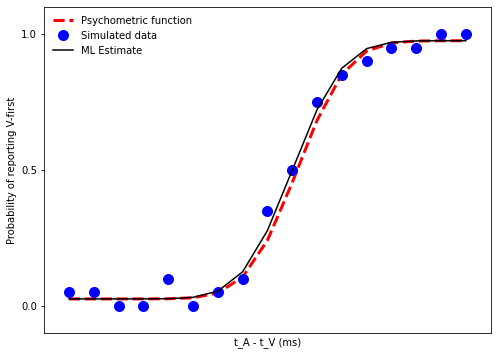

In [107]:
#display the best-fitting parameter and check if the answer is very similar
#to the one you got from the grid search
print(mu_hat_)
if np.abs(mu_hat - mu_hat_) < 1:
    print('Checked!')

#plot the fitted curve

fig, ax = plt.subplots(nrows=1, ncols=1,figsize= (8,6))
plt.plot(t_diff, P_reportV_1st, c = 'r', lw=3,linestyle = 'dashed')
plt.plot(t_diff, sim_prob_V1st, '.', color = 'b', markersize=20)
plt.plot(t_diff, P_tilde(mu_hat_, sigma_deltaT, lapse, t_diff), 'k')
plt.xlim([-450, 450]); plt.ylim([-0.1,1.1]); plt.xlabel('t_A - t_V (ms)')
plt.ylabel('Probability of reporting ''V-first'''); plt.xticks(t_diff[0:2:-1])
plt.yticks([0,0.5,1]); plt.legend(['Psychometric function','Simulated data', 'ML Estimate'], frameon = False)

#Note that the tolerance is set to be pretty big because the the bin we use
#for mu_hyp is big. If you want to try finner grids 
#(e.g., mu_hyp = np.arange(-60, 150, 0.01), go ahead! Just keep in mind that the finer
#the grids are, the longer it's gonna take for you to compute all the log
#likelihoods.

## Exercise 4. continued
Now let's assume sigma_deltaT is also unknown, so we have two free parameters. Again, we'll try two methods, which will give similar results.

In [108]:
sigma_hyp = np.arange(10, 161, 1)
#YOUR CODE STARTS HERE
#--------------------------------------------------------------------------
#----------------------- Method 1: using grid search ---------------------- 
#we have to first define a new function that takes two free parameters and
#computes the negative log likelihood of the parameters

def nLogL_mu_sigma_hyp(p, x, n, k):
    from scipy.stats import norm
    from numpy import log
    
    nLL = 0
    for i in range(len(k)): #number of stimulus levels
        try:
            pc = norm.cdf(x, p[0], p[1])*(1-lapse) + lapse/2
            nLL -= np.sum(k*log(pc) + (n-k)*log(1-pc))
        except:
            print('.',end = '')
    return nLL    

#for each combination of mu_hyp and sigma_hyp, call the function 
#nLogL_mu_sigma_hyp for computing the negative log likelihood
nLogL_hyp_mu_sig = np.zeros((len(mu_hyp), len(sigma_hyp)))
for i in range(len(mu_hyp)):
    for j in range(len(sigma_hyp)):
        nLogL_hyp_mu_sig[i,j] = nLogL_mu_sigma_hyp([mu_hyp[i], sigma_hyp[j]],
                                t_diff, numTrials, numT_V1st)
        
#find the value that minimizes the negative log likelihood
#hint: use np.argmin and np.unravel_index
min_flattened_idx = np.argmin(nLogL_hyp_mu_sig)
i_min, j_min = np.unravel_index(min_flattened_idx, nLogL_hyp_mu_sig.shape)
mu_hat = mu_hyp[i_min]
sigma_hat = sigma_hyp[j_min]
min_LL_value = nLogL_hyp_mu_sig[i_min, j_min]

In [123]:
#----------------------- Method 2: using fmincon -------------------------- 
#Let's define an initial random value somewhere in our range as a seeding point

lb = [0, 40]
ub = [100, 120]
init_0 = np.random.uniform(lb[0], ub[0])
init_1 = np.random.uniform(lb[1], ub[1])
fits_mu_sigma = minimize(nLogL_mu_hyp, (init_0, init_1), method = 'L-BFGS-B', 
                   args = data_tuple, 
                   bounds = ((lb[0], ub[0]), (lb[1], ub[1])))
mu_hat_ = fits_mu_sigma.x[0]
sigma_hat_ = fits_mu_sigma.x[1]
print(fits_mu_sigma)
print(mu_hat_)
print(sigma_hat_)


...................................................      fun: 0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([51.00168523, 82.89419958])
51.00168523182502
82.89419957627615


<IPython.core.display.Javascript object>


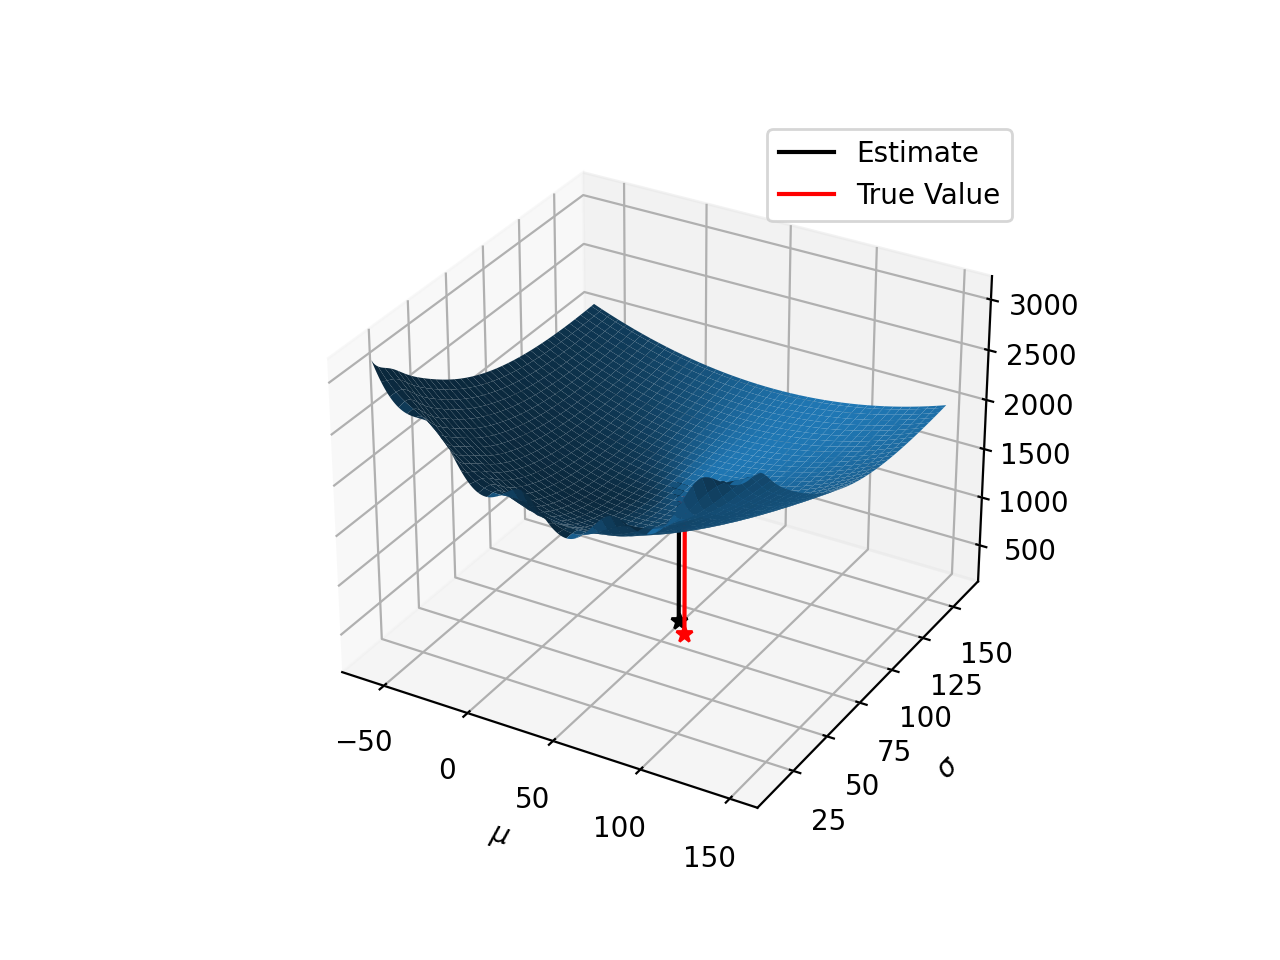

In [125]:
#plot the log likelihood as a function of mu_hyp and sigma_hyp using
#meshgrid along with the best-fitting parameters found using grid search
#or fmin.
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
MU_hyp, SIGMA_hyp = np.meshgrid(mu_hyp, sigma_hyp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(MU_hyp, SIGMA_hyp, nLogL_hyp_mu_sig.T)
ax.plot([mu_hat, mu_hat], [sigma_hat, sigma_hat], [min_LL_value, 180], '*', color='k')
ax.plot([mu_hat, mu_hat], [sigma_hat, sigma_hat], [min_LL_value, 180], color='k', label='Estimate')
ax.plot([mu_delta_t, mu_delta_t], [sigma_deltaT, sigma_deltaT], [min_LL_value, 180], '*', color='r')
ax.plot([mu_delta_t, mu_delta_t], [sigma_deltaT, sigma_deltaT], [min_LL_value, 180], color='r', label='True Value')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.legend()

<IPython.core.display.Javascript object>


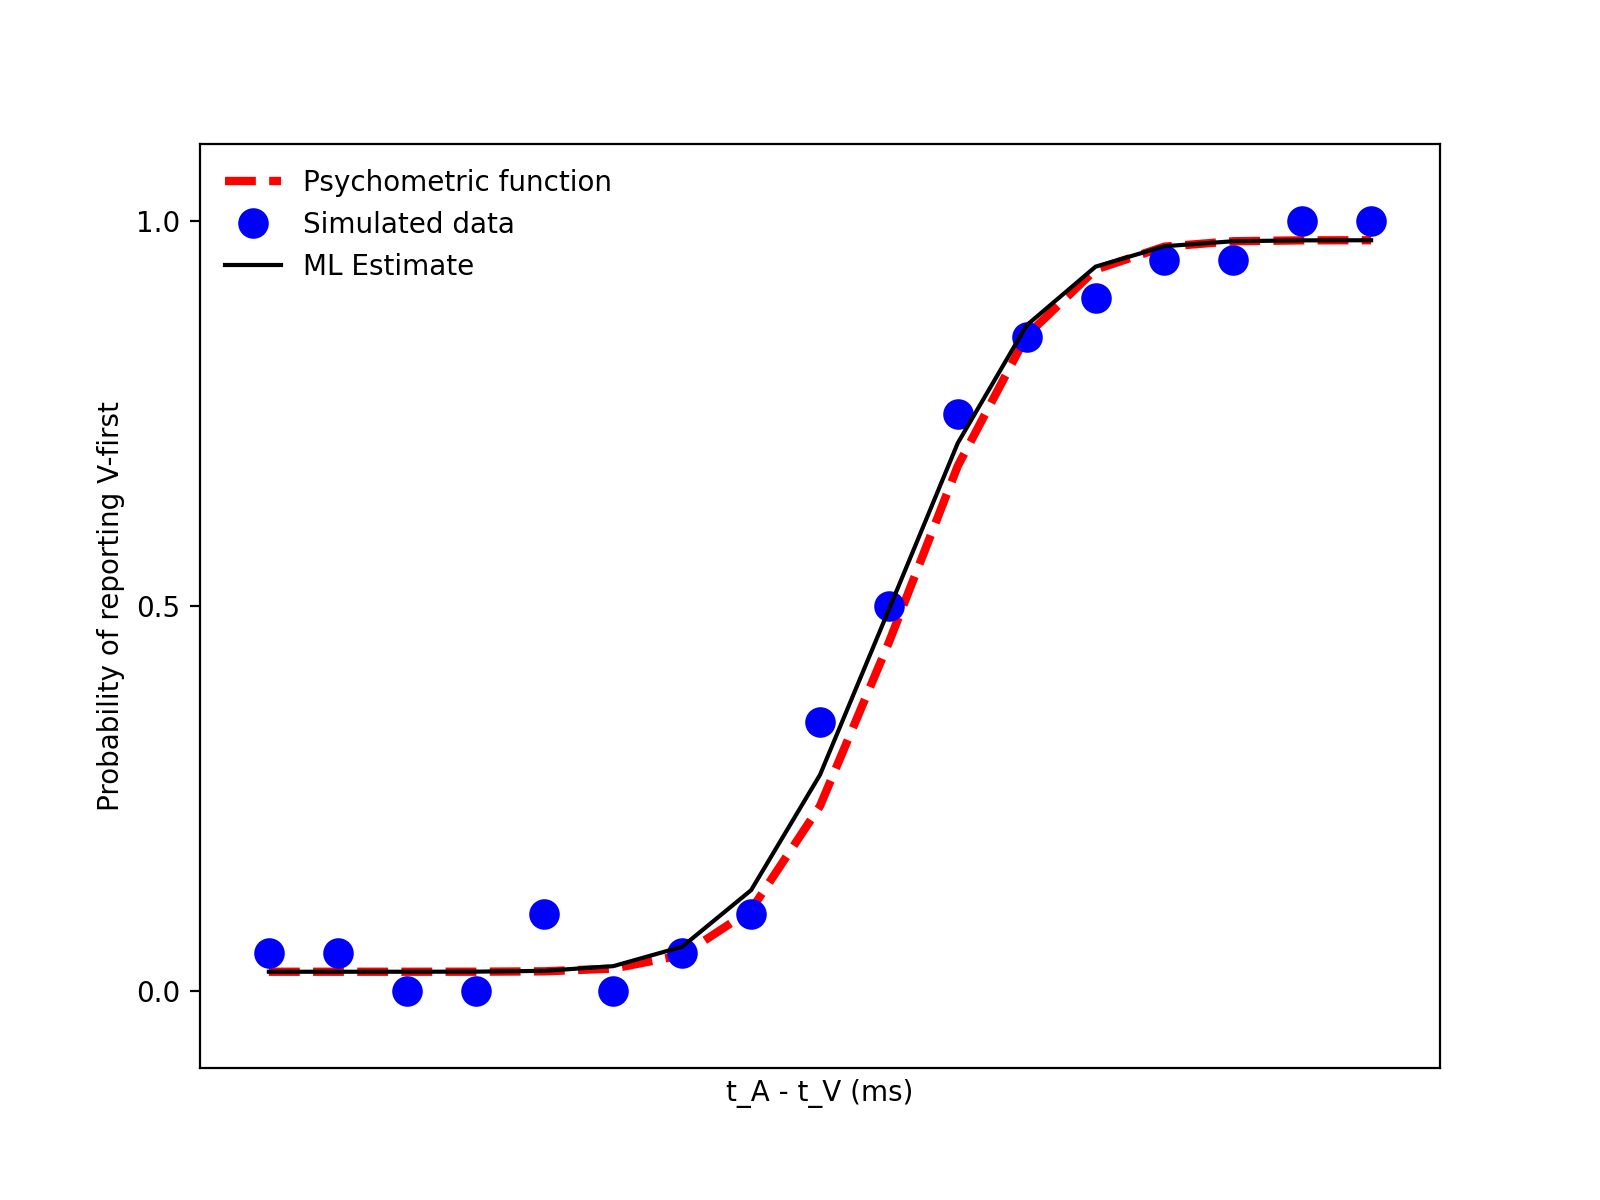

In [126]:
#Plot the fitted curve
fig, ax = plt.subplots(nrows=1, ncols=1,figsize= (8,6))
plt.plot(t_diff, P_reportV_1st, c = 'r', lw=3,linestyle = 'dashed')
plt.plot(t_diff, sim_prob_V1st, '.', color = 'b', markersize=20)
plt.plot(t_diff, P_tilde(mu_hat_, sigma_hat_, lapse, t_diff), 'k')
plt.xlim([-450, 450]); plt.ylim([-0.1,1.1]); plt.xlabel('t_A - t_V (ms)')
plt.ylabel('Probability of reporting ''V-first'''); plt.xticks(t_diff[0:2:-1])
plt.yticks([0,0.5,1]); plt.legend(['Psychometric function','Simulated data', 'ML Estimate'], frameon = False)

## Exercise 5: Bootstrapping
Bootstrap uses random sampling with replacement (i.e., say that you have [1,2,3,4,5] in a magic bag. You randomly draw one number from the bag each time, and then put it back). This means as you repeatedly sample from the bag, each number can be selected more/less than once. Bootstrap is often used when you want to get a confidence interval on estimated parameters. 

In [127]:
#first write a function that resamples from the data with replacement
def bootstrap_solutions(s_unique, r_org, nT):
    
    #initialize the resampled responses
    
    r_slc = np.zeros((len(s_unique), nT))
    
    # YOUR CODE START HERE
    #--------------------------------------------------------------------------
    #for each stimulus location, we resample the responses
    for j in range(len(s_unique)):
        #randomly select trial indices (indices are allowed to occur more
        #than once, since we resample with replacement).
        #Hint: you'll find function np.random.randint useful
        idx        = np.random.randint(low=0, high=nT, size=nT)
        #store the resampled responses
        r_slc[j,:] = r_org[idx, j]
    #--------------------------------------------------------------------------
    #compute the total number of V-first responses given each SOA
    nT_V1st_slc = np.sum(r_slc, 1)
    
    return r_slc, nT_V1st_slc

In [128]:
# YOUR CODE START HERE
#--------------------------------------------------------------------------
#let's bootstrap 1000 times
numBtst   = 1000
estP_btst = np.zeros((numBtst, 2))
minNLL    = np.zeros((numBtst, 1))
for i in range(numBtst):
    #fill in the function bootstrap
    [_, nT_V1st_btst] = bootstrap_solutions(t_diff, bool_V1st_, numTrials);
    
    data_btst_tuple = (t_diff, numTrials, nT_V1st_btst)
    fits_mu_sigma = minimize(nLogL_mu_sigma_hyp, (init_0, init_1), method = 'L-BFGS-B', 
                   args = data_btst_tuple, 
                   bounds = ((lb[0], ub[0]), (lb[1], ub[1])))
    #[mu_hat_btst, sigma_hat_btst] = fmin(nLL, np.array([init_0, init_1]))
    
    estP_btst[i,:] = np.array([fits_mu_sigma.x[0], fits_mu_sigma.x[1]])

#find 95% confidence interval
#first sort the vector in an ascending order
from math import ceil, floor
mu_sorted    = sorted(estP_btst[:,0])
CI_ub_mu     = mu_sorted[ceil(numBtst*0.975) - 1] #upper bound
CI_lb_mu     = mu_sorted[floor(numBtst*0.025)] #lower bound

sigma_sorted    = sorted(estP_btst[:,1])
CI_ub_sigma     = sigma_sorted[ceil(numBtst*0.975) - 1] #upper bound
CI_lb_sigma     = sigma_sorted[floor(numBtst*0.025)] #lower bound

<IPython.core.display.Javascript object>


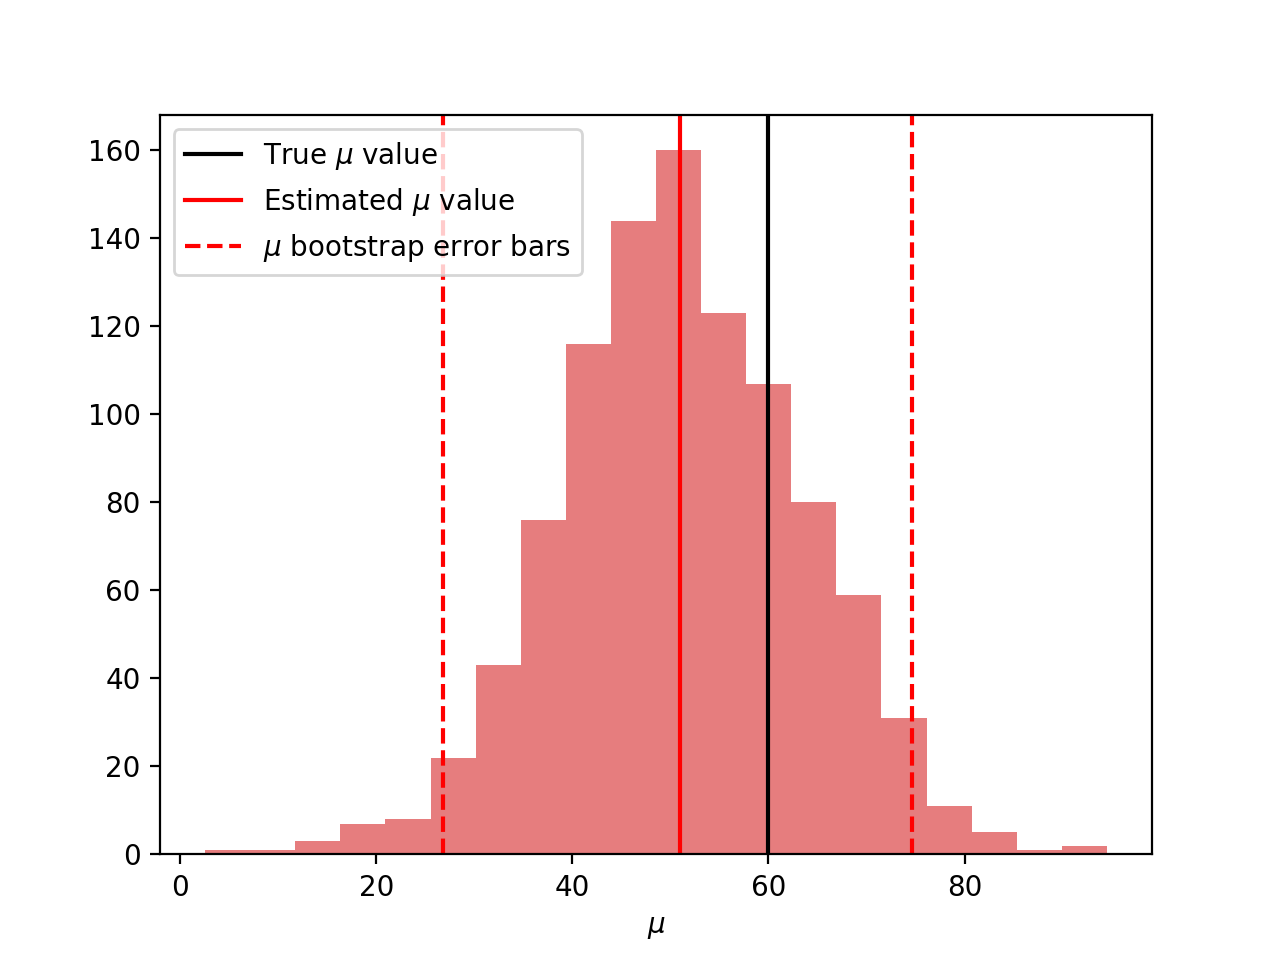

In [129]:
## Exercise 5. continued
#Plot the best-fitting parameters given each bootstrapped dataset
#No changes are needed for this section

plt.figure()
plt.hist(estP_btst[:, 0], bins=20, color='C3', alpha=0.6)
plt.axvline(x=mu_delta_t, color='k', linestyle='-')
plt.axvline(x=mu_hat_, color='r', linestyle='-')
plt.axvline(x=CI_lb_mu, color='r', linestyle='--')
plt.axvline(x=CI_ub_mu, color='r', linestyle='--')
plt.xlabel('$\mu$')
plt.legend(['True $\mu$ value', 'Estimated $\mu$ value', '$\mu$ bootstrap error bars'])

<IPython.core.display.Javascript object>


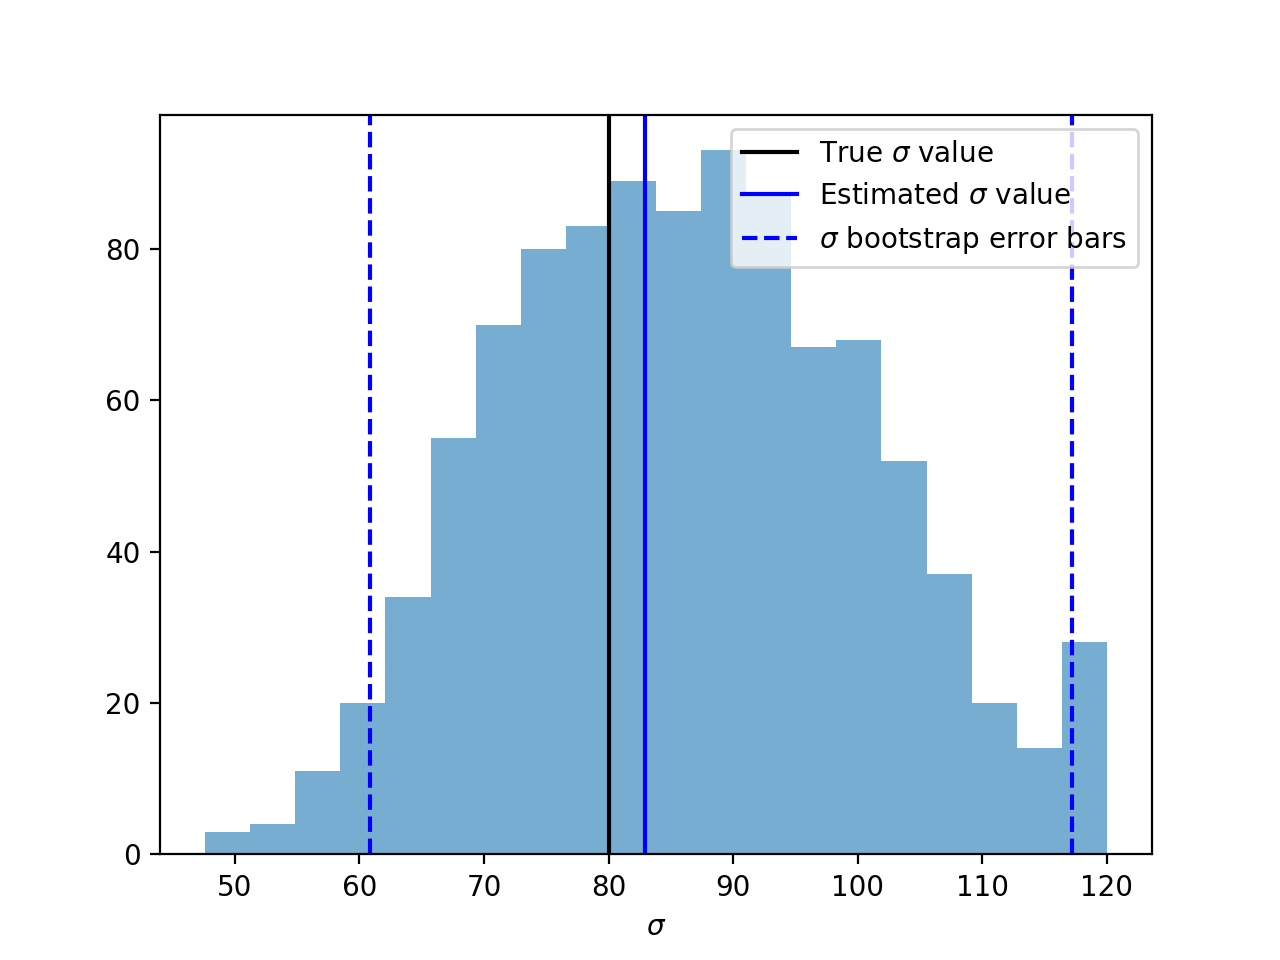

In [130]:
plt.figure()
plt.hist(estP_btst[:, 1], bins=20, color='C0', alpha=0.6)
plt.axvline(x=sigma_deltaT, color='k', linestyle='-')
plt.axvline(x=sigma_hat_, color='b', linestyle='-')
plt.axvline(x=CI_lb_sigma, color='b', linestyle='--')
plt.axvline(x=CI_ub_sigma, color='b', linestyle='--')
plt.xlabel('$\sigma$')
plt.legend(['True $\sigma$ value', 'Estimated $\sigma$ value', '$\sigma$ bootstrap error bars'])